# 파이썬 통계 분석 기초 (Introduction to Statistics)

통계학은 무작위 변수가 집합적으로 행동하는 방식에 대한 학문입니다. 통계학은 또한 추론과 논증을 만들기 위해 그 행동을 활용하는 분야입니다. 통계적 계산의 이면에 있는 수학의 대부분은 엄격하고 정확하지만, 이를 실제 데이터에 적용하는 것은 종종 불완전한 가정을 필요로 합니다. 이번 강의에서 우리는 몇 가지 기본적인 통계적 지식을 리뷰해보고 그것들을 응용하는데 있어 우리가 만들어야 하는 가정들에 특별한 주의를 기울일 것입니다.

## 가설 검정과 모수 추정 (Hypothesis Testing and Parameter Estimator)

우리는 종종 통계를 사용하여 사람들이나 사건의 그룹을 설명합니다. 예를 들어, 현재 온도를 평균 온도와 비교하거나 특정 날짜의 주가 변화를 변동성과 비교하곤 합니다. (통계적 용어로 변동성은 표준 편차(**standard deviation**)로 나타냅니다.) 또는 특정 국가에서 데이터 과학자의 평균 급여가 얼마인지 궁금할 수 있습니다. 이러한 모든 질문과 비교는 통계적 추론의 기본적인 형태입니다. 이러한 통계적 추론은 종종 가설 검정 혹은 모수 추정의 두 가지 범주 중 하나로 분류됩니다.

가설 검정의 예시는 다음과 같습니다.
- 주가 상승이 유의미한지 아니면 단지 노이즈에 불과한지를 검정
- 고학력자와 그렇지 않은 사람들간의 연봉 차이가 유의미한 수준인지를 검정
- 고객이 매장에서 지출한 금액과 고객이 본 광고 간에 유의한 상관 관계가 있는지 검정

모수 추정의 예시는 다음과 같습니다.
- 어떤 주식의 연평균 수익률 추정
- 특정 직업이 받는 연봉의 분산 추정
- 연간 광고 비용과 매출 간의 상관계수 추정

여기서는 위에서 언급한 고학력자와 저학력자간 급여를 예로 들어 통계적 추론 과정을 탐구할 예정입니다.

**Exercise:** Decide for each example given in the first sentence whether it is an example of hypothesis testing or parameter estimation.

첫 번째 문장에 주어진 각 예가 가설 검정의 예인지 모수 추정의 예인지 결정하십시오.

## 평균 추정 (Estimating the Mean)

우리는 과거 어떤 연구로부터 미국의 고급 학위를 가진 직원이 평균 $70,000를 번다는 것을 알고 있다고 가정하겠습니다. 만약 "고급 학위가 없는 사람들이 고급 학위를 가진 사람들보다 훨씬 적은 연봉을 받습니까?"라는 질문에 답하기 위해서는 먼저 고급 학위가 없는 사람들의 평균 수입을 추정해야 합니다.

이를 위해서는 우선 데이터를 수집해야 합니다. 고급 학위가 없는 취업 성인 1000명을 대표하는 편향이 없는 표본에서 급여를 알아본다고 가정해 보겠습니다. 고급 학위가 없는 사람들의 평균 급여를 추정하기 위해 이 샘플의 평균을 간단히 계산합니다.

$$ \overline X = \frac{1}{n} \sum_{k=1}^n X_k. $$

고급 학위가 없는 직원의 급여 샘플링을 시뮬레이션하는 코드를 작성해 보겠습니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact, IntSlider

salaries = stats.lognorm(1, loc=20, scale=25)

def plot_sample(dist):
    def plotter(size):
        X = dist.rvs(size=size)
        ys, bins, _ = plt.hist(X, bins=20, density=True)
        plt.ylim([0, ys.max() / (ys * (bins[1] - bins[0])).sum() * 1.25])
        plt.axvline(dist.mean(), color='r', label='true mean')
        plt.axvline(X.mean(), color='g', label='sample mean')
        plt.plot(np.arange(20, 100, .01), salaries.pdf(np.arange(20, 100, .01)), 'k--')
        plt.legend()

    return plotter

In [5]:
sample_size_slider = IntSlider(min=10, max=200, step=10, value=10, description='sample size')
interact(plot_sample(salaries), size=sample_size_slider);

interactive(children=(IntSlider(value=10, description='sample size', max=200, min=10, step=10), Output()), _do…

## 평균의 표준 오차 (Standard Error of the Mean)

위의 예시에서는 코드를 실행할 때마다 플롯을 생성하기 위해 서로 다른 샘플이 추출된다는 것을 알 수 있습니다. 실제 평균값은 고정된 상태로 유지되지만 표본 평균의 경우에는 매번 플롯을 그릴 때마다 변경이 됩니다. 즉, 실제 평균의 추정(표본 평균)은 잡음이 있고 약간의 오류가 있습니다는 것을 의미합니다. 그렇다면 이러한 추정에는 어느 정도의 잡음이 있는 걸까요? 일반적으로는 실제 평균과 얼마나 다를까요? 즉 표본 평균의 표준 편차(**standard deviation**)는 얼마일까요?

여러 표본들을 추출해서 표본 평균에 대한 히스토그램을 생성한 후에 표본 평균과 실제 평균간의 차이를 한 번 시각화해보겠습니다.

In [6]:
def plot_sampling_dist(dist):
    def plotter(sample_size):
        means = np.array([dist.rvs(size=sample_size).mean() for _ in range(300)]) - dist.mean()
        plt.hist(means, bins=20, density=True, label='sample means')

        # plot central limit theorem distribution
        Xs = np.linspace(means.min(), means.max(), 1000)
        plt.plot(Xs, sp.stats.norm.pdf(Xs, scale=np.sqrt(dist.var()/sample_size)), 'k--',
                 label='central limit theorem')

        plt.legend()

    return plotter

In [7]:
sample_size_slider = IntSlider(min=10, max=500, step=10, value=10, description='sample size')
interact(plot_sampling_dist(salaries),
         sample_size=sample_size_slider);

interactive(children=(IntSlider(value=10, description='sample size', max=500, min=10, step=10), Output()), _do…

표본의 크기를 늘리면 표본 평균의 분포가 정규 분포와 유사해집니다. 실제로 이것은 개별 급여의 기본 분포와 상관없이 발생합니다. 이 현상은 표본 크기가 증가함에 따라 표본 평균이 표준 편차를 갖는 정규 분포를 따르는 경향이 있다는 중심 극한 정리에 의해 설명됩니다.

$$ \sigma_{\overline X} = \sqrt{\frac{\sigma^2}{n}}.$$

우리는 이 값을 표준 오차(**standard error**)라고 부르며, 실제 평균에서 표본 평균의 표준 편차를 정량화합니다.

## 가설 검정과 Z-스코어 (Hypothesis Testing and z-scores)

이제 무작위 확률로 표본 평균이 실제 평균과 얼마나 다를 것인지를 계산할 수 있으므로 가설 검정(**hypothesis test**)을 수행할 수 있습니다. 가설 검정에서는 실제 평균을 이미 알고 있다고 가정합니다. 그런 다음 표본을 수집하고 표본 평균과 가정된 실제 평균 간의 차이를 계산합니다. 이 차이를 표준 오차(즉, 무작위 우연에서 발생할 것으로 예상할 수 있는 일반적인 차이)와 비교하여 크면 클수록 실제 평균이 우리가 가정한 값이 아닐 가능성이 높다는 결론을 내립니다. 예제를 통해 이를 좀 더 자세하게 알아보겠습니다.

1. 이전 연구로부터 미국의 고급 학위를 가진 직원이 평균 \$70,000를 번다는 것을 알고 있다고 가정합니다. 우리의 귀무 가설(**null hypothesis**)은 고급 학위가 없는 직원이 동일한 급여를 받는다는 것입니다: $H_0: \mu = 70$. 우리는 또한 유의성에 대한 역치를 설정합니다. 귀무가설이 틀렸다고 말하기 위해서는 무작위 확률로 인해 발생할 확률이 특정 확률 $\alpha$ 미만인 증거를 찾아야 합니다.

In [8]:
mu = 70

2. 다음으로 고급 학위가 없는 $n$ 직원의 급여 표본을 수집하고 표본 추출된 급여의 평균을 계산합니다. 아래에서는 100명의 직원을 샘플링합니다.

In [9]:
sample_salaries = salaries.rvs(size=100)
print('Sample mean: {}'.format(sample_salaries.mean()))

Sample mean: 58.10248575482998


3. 이제 표본 평균과 가정된 실제 평균 간의 차이를 표준 오차와 비교합니다. 이 값을 Z-스코어(**z-score**)라고 합니다.

$$ z = \frac{\overline X - \mu}{\sigma / \sqrt{n}} $$

In [10]:
z = (sample_salaries.mean() - mu) / np.sqrt(salaries.var() / sample_salaries.size)
print('z-score: {}'.format(z))

z-score: -2.2020226671874887


4. Z-스코어는 표준 정규 분포(중심 극한 정리로 인해)와 함께 사용하여 표본 평균과 귀무 가설 간의 차이가 무작위 확률에 의한 것일 확률을 계산할 수 있습니다. 이 확률을 p-밸류(**p-value**)라고 합니다.

In [11]:
p = sp.stats.norm.cdf(z)
print('p-value: {}'.format(p))

p-value: 0.013831853677122257


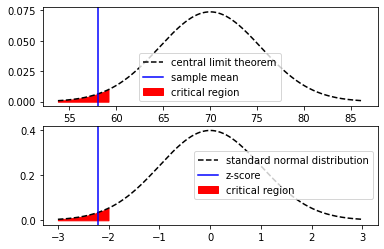

In [12]:
plt.subplot(211)
stderr = np.sqrt(salaries.var() / sample_salaries.size)
Xs = np.linspace(mu - 3*stderr, mu + 3*stderr, 1000)
clt = sp.stats.norm.pdf(Xs, loc=mu, scale=stderr)
plt.plot(Xs, clt, 'k--',
         label='central limit theorem')
plt.axvline(sample_salaries.mean(), color='b', label='sample mean')
plt.fill_between(Xs[Xs < mu - 2*stderr], 0, clt[Xs < mu - 2*stderr], color='r', label='critical region')
plt.legend()

plt.subplot(212)
Xs = np.linspace(-3, 3, 1000)
normal = sp.stats.norm.pdf(Xs)
plt.plot(Xs, normal, 'k--', label='standard normal distribution')
plt.axvline(z, color='b', label='z-score')
plt.fill_between(Xs[Xs < -2], 0, normal[Xs < -2], color='r', label='critical region')
plt.legend();

5. $p$-값이 $\alpha$보다 작으면 귀무 가설을 기각할 수 있습니다. 무작위로 발생하지 않을 가능성이 매우 높은 증거를 찾았으므로 실제 평균 값에 대한 초기 가정이 틀렸다고 생각할 수 있습니다.

이것은 가설 검정의 매우 단순화된 버전이지만 핵심 아이디어는 공식적인 가설 검정 프레임워크 외부에서 유용한 도구가 될 수 있습니다. 관찰된 값과 우리가 기대하는 값 사이의 차이를 계산한 다음, 이 차이가 무작위적 우연으로 인해 발생할 수 있는 예상되는 차이과 얼마나 다른가를 비교함으로써 우리는 측정하거나 계산한 값에 대한 직관적인 판단을 신속하게 내릴 수 있습니다.

## 신뢰 구간 (Confidence Intervals)

모수 추정을 수행하기 위해 중심 극한 정리를 사용할 수 있습니다. 이는 표본 평균을 사용하여 고급 학위가 없는 직원의 평균 급여를 추정하는 것을 의미합니다. 하지만 이 추정치는 표본의 무작위성으로 인해 실제 평균에서 다소 벗어납니다. 그러므로 우리는 추정치에 확률적 한계를 두어야 합니다. 이 확률을 계산하는 데 도움이 되도록 표준 오차를 다시 사용할 수 있습니다.

Confidence interval (95%) for average salary: (47.30 68.91)


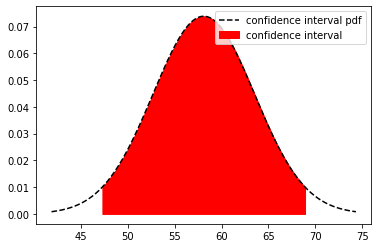

In [13]:
print("Confidence interval (95%) for average salary: ({:.2f} {:.2f})".format(sample_salaries.mean() - 2 * stderr,
                                                                             sample_salaries.mean() + 2 * stderr))

Xs = np.linspace(sample_salaries.mean() - 3*stderr,
                 sample_salaries.mean() + 3*stderr,
                 1000)
ci = sp.stats.norm.pdf(Xs, loc=sample_salaries.mean(), scale=stderr)
plt.plot(Xs, ci, 'k--',
         label='confidence interval pdf')
plt.fill_between(Xs[(Xs > sample_salaries.mean() - 2*stderr) & (Xs < sample_salaries.mean() + 2*stderr)],
                 0,
                 clt[(Xs > sample_salaries.mean() - 2*stderr) & (Xs < sample_salaries.mean() + 2*stderr)],
                 color='r', label='confidence interval')
plt.legend(loc = 'upper right');

*Copyright 2021.* 퀀트대디. *This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*